In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from os import path

In [2]:
DATA_DIR = "../../data/"

In [3]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen/chen_data.csv"))
chen_data.rename({"Antibody_ID": "Ab_ID"}, axis=1, inplace=True)
chen_data.head(5)

Ab_ID                                              heavy  \
0  12e8  EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...   
1  15c8  EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...   
2  1a0q  EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...   
3  1a14  QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...   
4  1a2y  QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...   

                                               light  Y  
0  DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...  0  
1  DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...  0  
2  DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...  1  
3  DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...  0  
4  DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...  0

In [4]:
y_data = chen_data["Y"]

# Physicochemical features (PyBioMed)

## t-SNE

In [9]:
#X_train_data = pd.read_feather(path.join(DATA_DIR, "chen/pybiomed/X_train_data.ftr"))
#X_test_data = pd.read_feather(path.join(DATA_DIR, "chen/pybiomed/X_test_data.ftr"))
#X_valid_data = pd.read_feather(path.join(DATA_DIR, "chen/pybiomed/X_valid_data.ftr"))

In [18]:
#X_data = pd.concat([X_train_data, X_test_data, X_valid_data])
X_data = pd.read_feather(path.join(DATA_DIR, "chen/pybiomed/X_data.ftr"))
data_labels = X_data["Ab_ID"]
X_data.drop("Ab_ID", axis=1, inplace=True)
X_data

0      1      2      3      4      5      6       7      8      9  \
0     7.500  3.333  2.500  5.833  1.667  5.833  5.833   9.167  1.667  4.167   
1     9.244  0.000  3.361  5.882  1.681  4.202  6.723   8.403  2.521  3.361   
2     5.882  1.681  3.361  5.042  1.681  5.882  5.042   9.244  1.681  4.202   
3     6.667  2.500  4.167  5.000  1.667  2.500  7.500  11.667  0.000  1.667   
4     3.448  5.172  4.310  6.034  1.724  2.586  6.034  10.345  0.862  2.586   
...     ...    ...    ...    ...    ...    ...    ...     ...    ...    ...   
2404  6.723  4.202  3.361  5.042  1.681  4.202  3.361  10.084  0.000  5.042   
2405  3.968  3.968  0.794  5.556  1.587  3.968  4.762   9.524  1.587  3.175   
2406  7.627  5.085  1.695  4.237  1.695  4.237  4.237  10.169  0.000  1.695   
2407  5.128  5.983  2.564  4.274  1.709  1.709  5.128  10.256  0.000  2.564   
2408  6.612  7.438  3.306  4.959  1.653  1.653  4.132  10.744  0.826  3.306   

      ...  19750  19751  19752  19753  19754  19755  19756  19757  19758  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2404  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2405  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2406  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2407  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2408  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      19759  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
2404    0.0  
2405    0.0  
2406    0.0  
2407    0.0  
2408    0.0  

[2409 rows x 19760 columns]

In [14]:
def plot_tsne(
    x, y, components, perplexity, n_iter, metric, comp_to_plot=[0,1]
):
    tsne = TSNE(n_components=components, verbose=1, perplexity=perplexity, n_iter=n_iter, metric=metric)
    X_embedded = tsne.fit_transform(x)
    
    df = pd.DataFrame()
    df['x'] = X_embedded[:,comp_to_plot[0]]
    df['y'] = X_embedded[:,comp_to_plot[1]]
    df["label"] = y

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        legend="full",
        alpha=0.6,
        palette=['#1f76b4','orange']
    )
    plt.show()

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.023s...
[t-SNE] Computed neighbors for 2409 samples in 1.802s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.000045
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.261391
[t-SNE] KL divergence after 300 iterations: 1.270529


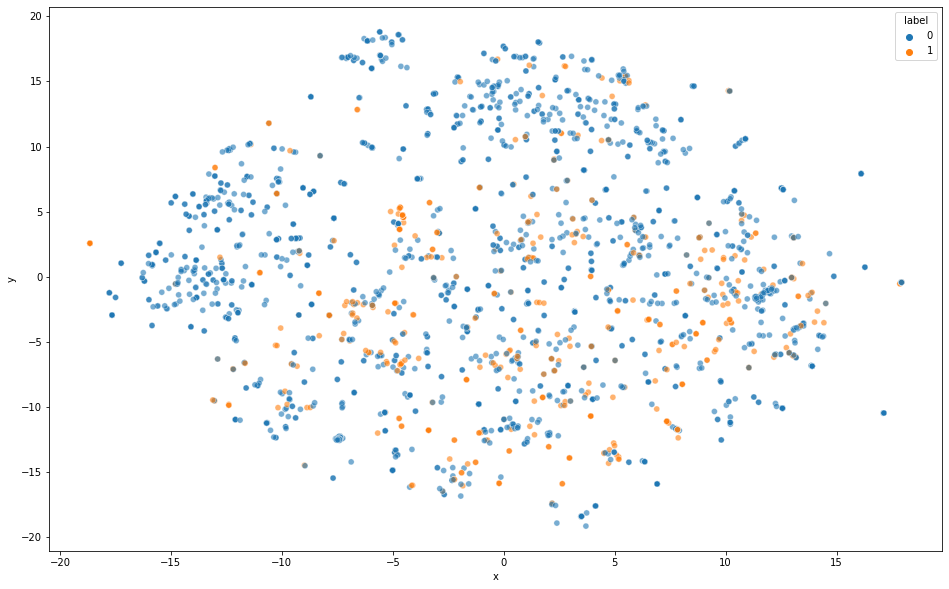

In [16]:
plot_tsne(X_data, y_data.tolist(), components=2, perplexity=40, n_iter=300, metric="euclidean")

### Different settings

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.035s...
[t-SNE] Computed neighbors for 2409 samples in 2.668s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.157043
[t-SNE] KL divergence after 10000 iterations: 0.418319


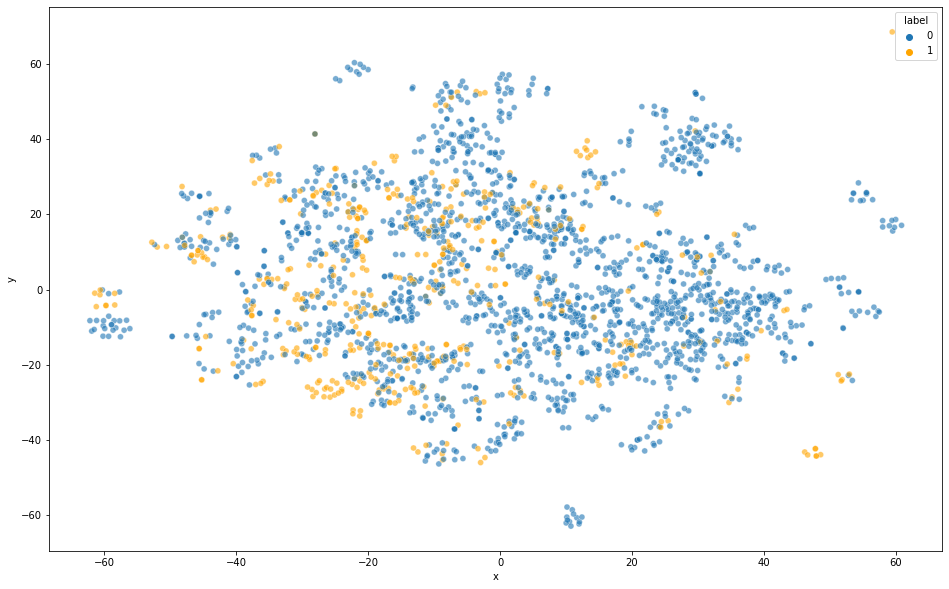

In [79]:
plot_tsne(X_data, y_data.tolist(), components=3, perplexity=6, n_iter=10000, metric="cosine")

## PCA

In [62]:
def plot_pca_precomp(x_pc, y, comp_to_plot):
    df = pd.DataFrame()
    df['x'] = x_pc[:,comp_to_plot[0]]
    df['y'] = x_pc[:,comp_to_plot[1]]
    df["label"] = y
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        legend="full",
        alpha=0.6,
        palette=['#1f76b4','orange']
    )
    plt.show()

In [27]:
def plot_pca(
    x, y, components, comp_to_plot=[0,1]
):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(x)
    
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum = np.cumsum(exp_var_pca)
    
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum)), cum_sum, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    plot_pca_precomp(X_pca, y, comp_to_plot)
    return X_pca

## Plot 1st and 2nd PC

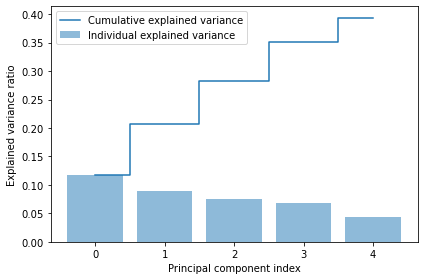

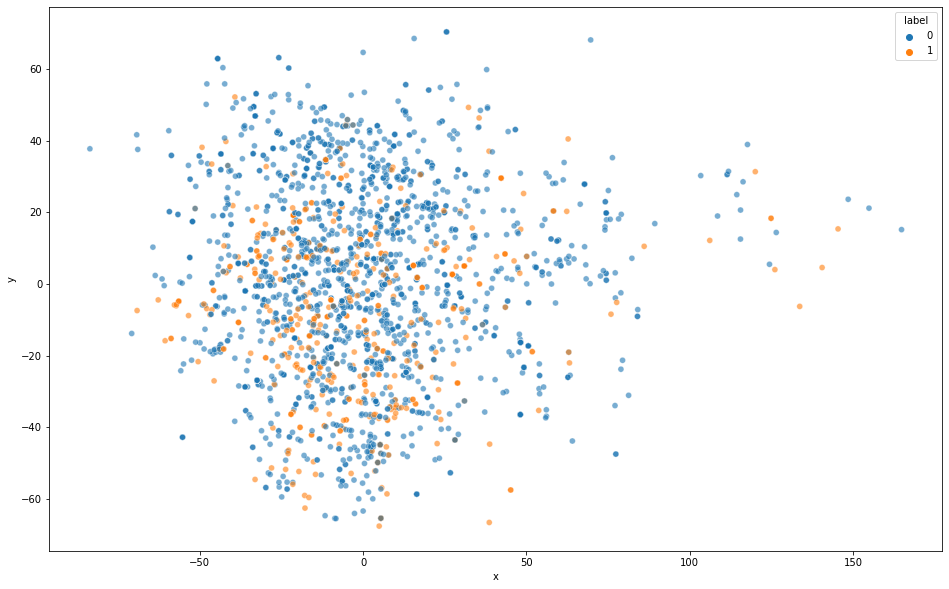

In [28]:
pca_transformed = plot_pca(X_data, y_data.tolist(), components=5, comp_to_plot=[0,1])

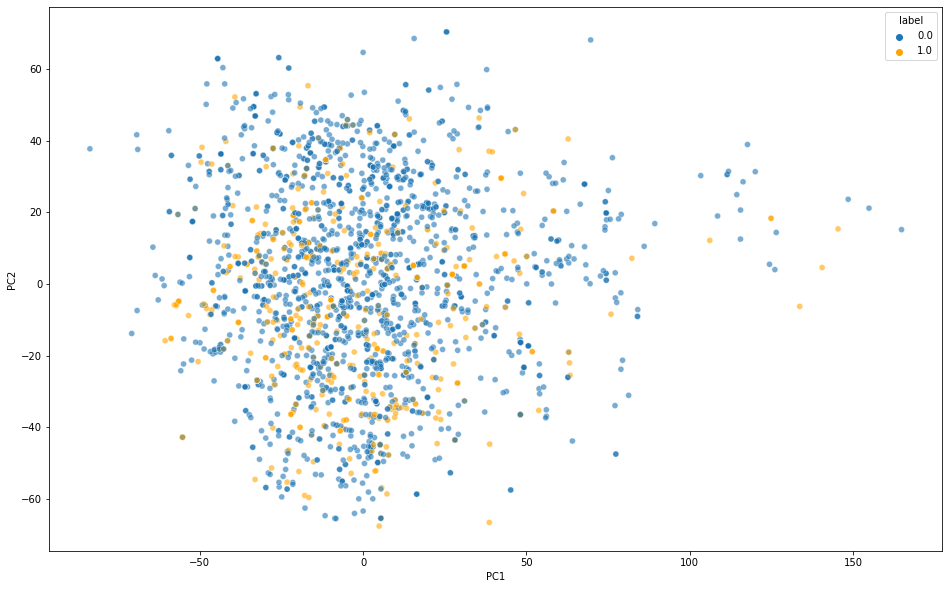

In [20]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_data)

df = pd.DataFrame()
df['x'] = X_pca[:,0]
df['y'] = X_pca[:,1]
df["label"] = y
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="x", y="y",
    hue="label",
    data=df,
    legend="full",
    alpha=0.6,
    palette=['#1f76b4','orange']
)
ax.set(xlabel='PC1', ylabel='PC2')
plt.show()

### 2nd and 3rd PC

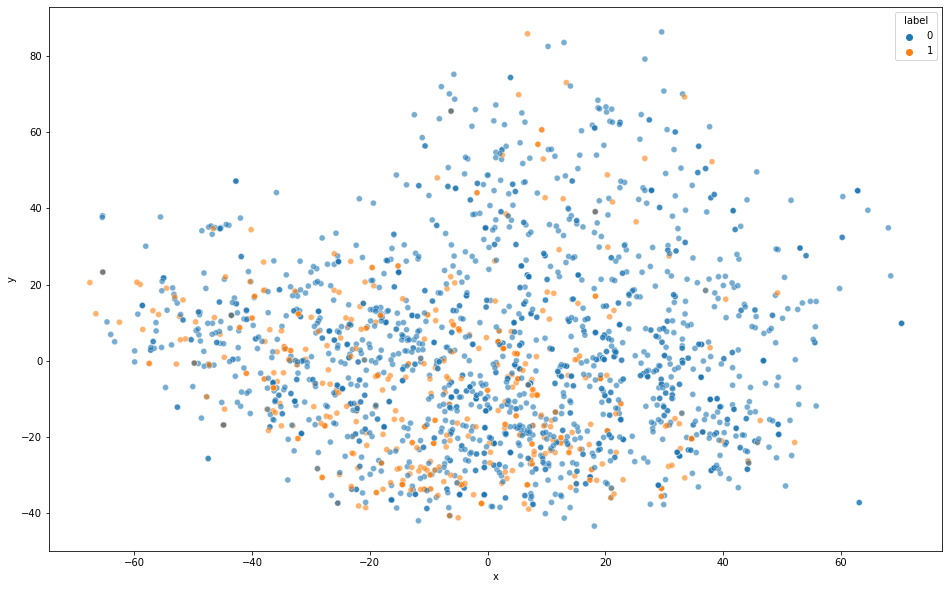

In [29]:
plot_pca_precomp(pca_transformed, y_data.tolist(), [1,2])

### PC 3 and 4

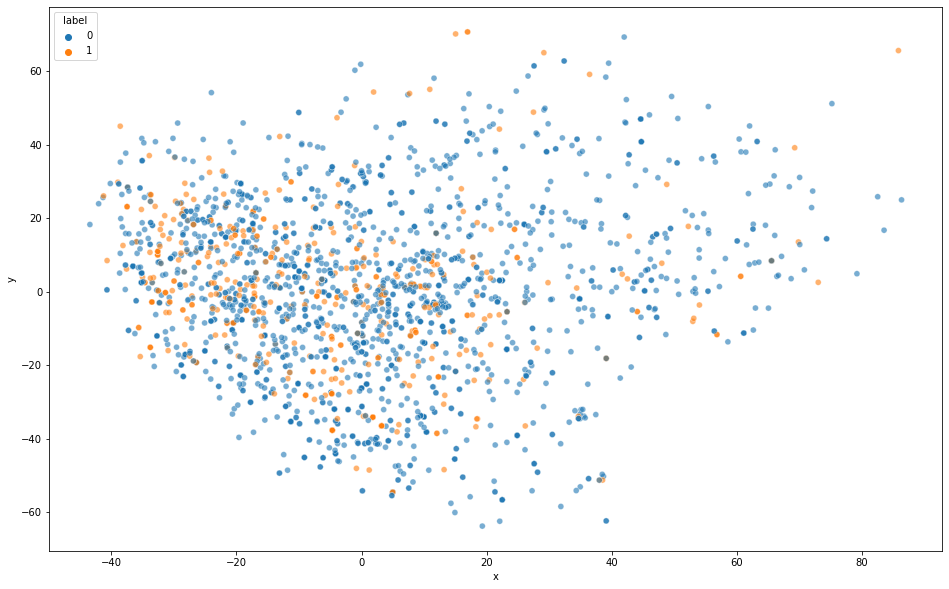

In [30]:
plot_pca_precomp(pca_transformed, y_data.tolist(), [2,3])

# Protparam

## t-SNE

In [52]:
protparam_data = pd.read_csv(path.join(DATA_DIR, "chen/protparam/protparam_features.csv"))
protparam_data.rename({"Unnamed: 0": "Ab_ID"}, axis=1, inplace=True)
protparam_data.drop("name", axis=1, inplace=True)

In [53]:
protparam_data = protparam_data.merge(chen_data, how="outer", on="Ab_ID")
protparam_data.dropna(inplace=True)
protparam_data["Y"] = protparam_data["Y"].astype("int32")

In [54]:
protparam_data

Ab_ID  aa_percent0_x  aa_percent1_x  aa_percent2_x  aa_percent3_x  \
0     3okd       0.081967       0.016393       0.040984       0.049180   
1     5fb8       0.049587       0.016529       0.049587       0.041322   
2     4olz       0.056000       0.032000       0.048000       0.040000   
3     1hh6       0.080357       0.017857       0.044643       0.044643   
4     1yef       0.048780       0.016260       0.032520       0.048780   
...    ...            ...            ...            ...            ...   
2421  1osp       0.033333       0.016667       0.033333       0.050000   
2422  4n8c       0.067227       0.016807       0.067227       0.025210   
2423  3giz       0.073770       0.016393       0.049180       0.032787   
2424  4kkl       0.057851       0.016529       0.049587       0.033058   
2425  6cw3       0.081301       0.016260       0.032520       0.040650   

      aa_percent4_x  aa_percent5_x  aa_percent6_x  aa_percent7_x  \
0          0.040984       0.106557       0.008197       0.016393   
1          0.024793       0.074380       0.016529       0.033058   
2          0.032000       0.088000       0.008000       0.032000   
3          0.026786       0.098214       0.026786       0.035714   
4          0.032520       0.089431       0.008130       0.040650   
...             ...            ...            ...            ...   
2421       0.041667       0.100000       0.008333       0.041667   
2422       0.025210       0.092437       0.016807       0.033613   
2423       0.024590       0.114754       0.008197       0.032787   
2424       0.024793       0.107438       0.000000       0.049587   
2425       0.024390       0.121951       0.008130       0.024390   

      aa_percent8_x  ...  mol_extinct1_y  mol_extinct2_y        mw_y  \
0          0.040984  ...           19940           20065  12297.7329   
1          0.074380  ...           15930           16055  12046.3419   
2          0.040000  ...           21430           21555  11093.1436   
3          0.071429  ...           15930           16055  11959.5343   
4          0.065041  ...           12950           13075  12078.6833   
...             ...  ...             ...             ...         ...   
2421       0.041667  ...           23950           24075  11755.9316   
2422       0.058824  ...           22920           23045  12464.9210   
2423       0.040984  ...           18450           18575  11694.9247   
2424       0.057851  ...           25440           25565  11425.5963   
2425       0.024390  ...           18450           18575  11524.7736   

       gravy_y  ss_faction1_y  ss_faction2_y  ss_faction3_y  \
0    -0.427679       0.276786       0.294643       0.205357   
1    -0.344144       0.279279       0.306306       0.225225   
2    -0.370297       0.306931       0.316832       0.158416   
3    -0.256075       0.308411       0.280374       0.196262   
4    -0.049107       0.330357       0.303571       0.178571   
...        ...            ...            ...            ...   
2421 -0.398131       0.280374       0.308411       0.168224   
2422 -0.226549       0.318584       0.283186       0.203540   
2423 -0.311215       0.280374       0.299065       0.224299   
2424 -0.310377       0.254717       0.311321       0.169811   
2425 -0.216822       0.280374       0.308411       0.168224   

                                                  heavy  \
0     EVKLVESGGGLVQPGGSLRLACATSGFTFTDYYMSWVRQPPGKALE...   
1     EVQLQQSGPELVKPGASMKISCKASGYSFTGYTMNWVKQSHGKNLE...   
2     QVRLSQSGGQMKKPGDSMRISCRASGYEFINCPINWIRLAPGKRPE...   
3     QDQLQQSGAELVRPGASVKLSCKALGYIFTDYEIHWVKQTPVHGLE...   
4     EMQLQQSGAELLRPGTSVKLSCKTSGYIFTSYWIHWVKQRSGQGLE...   
...                                                 ...   
2421  EVQLQESGPSLVKPSQTLSLTCSVTGEPITSGFWDWIRKFPGNKLE...   
2422  QVQLQQSGPEVVRPGVSVRISCKGSGYTFTDYAMHWVKQSHAKSLD...   
2423  EVQLVESGGGLVQPGRSLRLSCAASGFTFNDYAMHWVRQAPGKGLE...   
2424  EVRLLESGGGLVQPGGSLKLSCAASGFDYSRYWMSWVRQAPGKGLK...   
2425  EVQLVESGGGLVQPGGSLRLSC

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.001s...
[t-SNE] Computed neighbors for 2409 samples in 0.293s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.675510
[t-SNE] KL divergence after 300 iterations: 0.617988


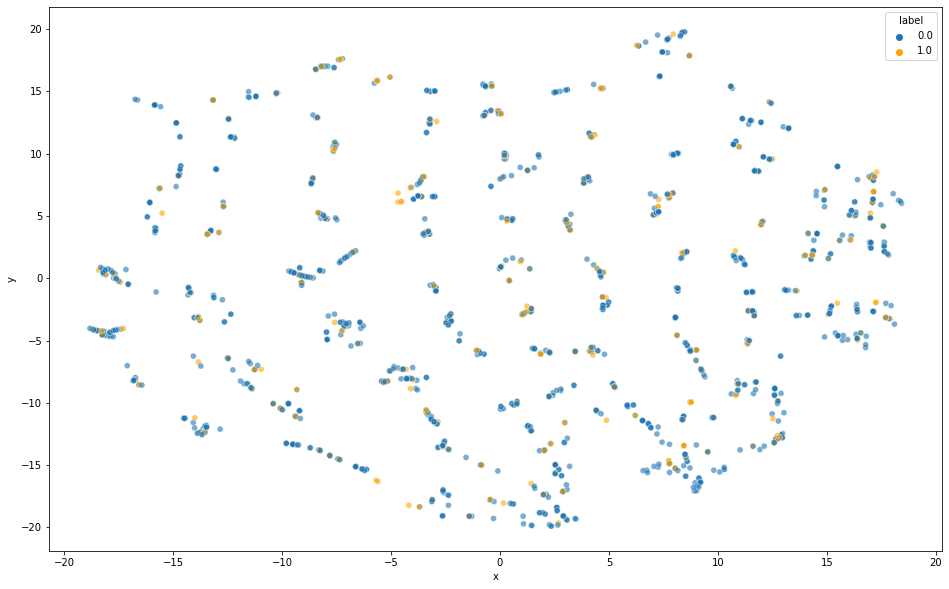

In [59]:
plot_tsne(protparam_data.iloc[:,1:63], protparam_data["Y"], components=2, perplexity=40, n_iter=300, metric="euclidean")

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.000s...
[t-SNE] Computed neighbors for 2409 samples in 0.198s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.296806
[t-SNE] KL divergence after 5000 iterations: 0.180452


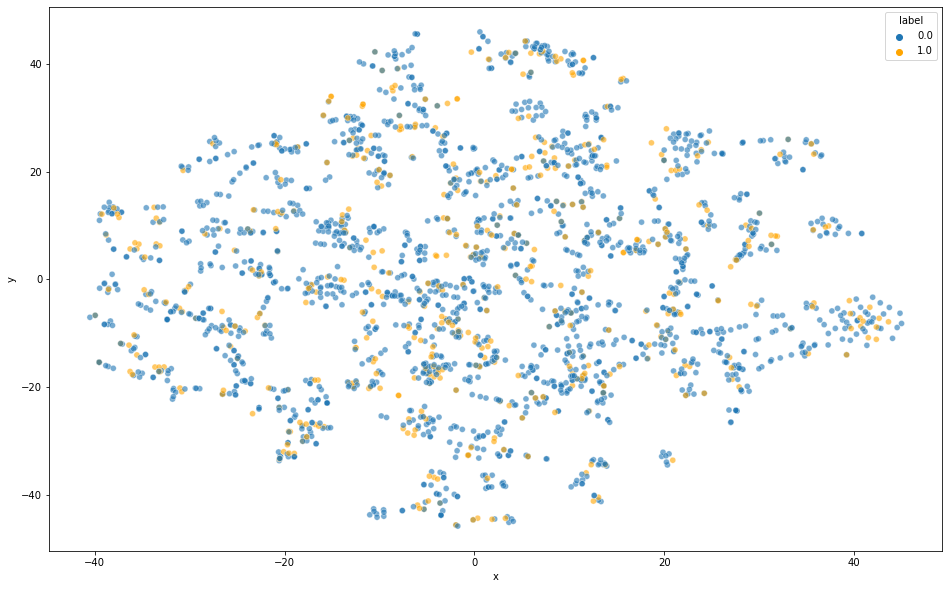

In [80]:
plot_tsne(protparam_data.iloc[:,1:63], protparam_data["Y"], components=3, perplexity=6, n_iter=5000, metric="cosine")

## PCA

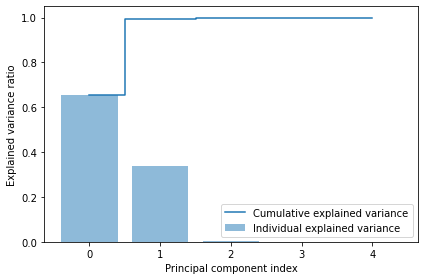

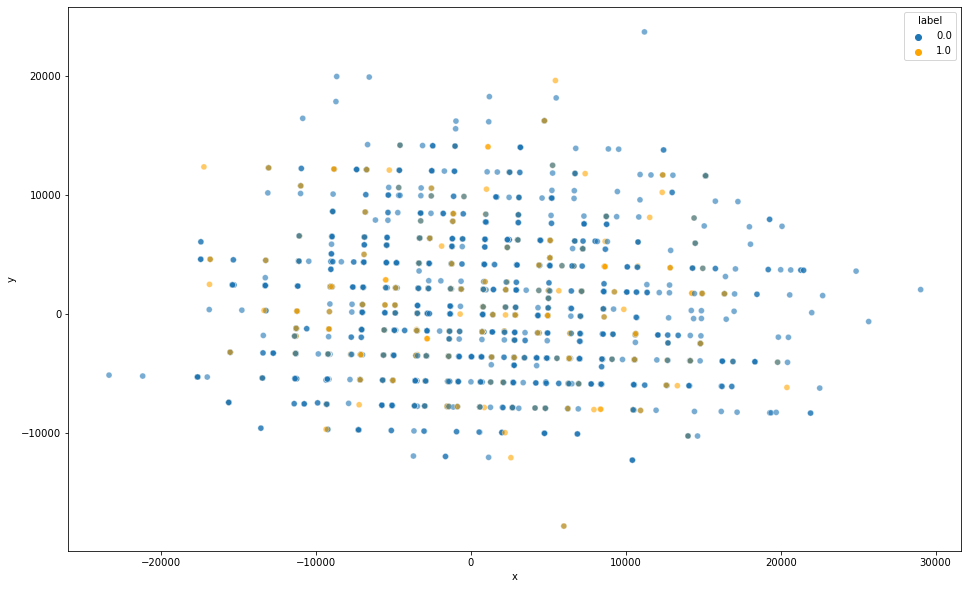

In [63]:
pca_transformed = plot_pca(protparam_data.iloc[:,1:63], protparam_data["Y"], components=5, comp_to_plot=[0,1])

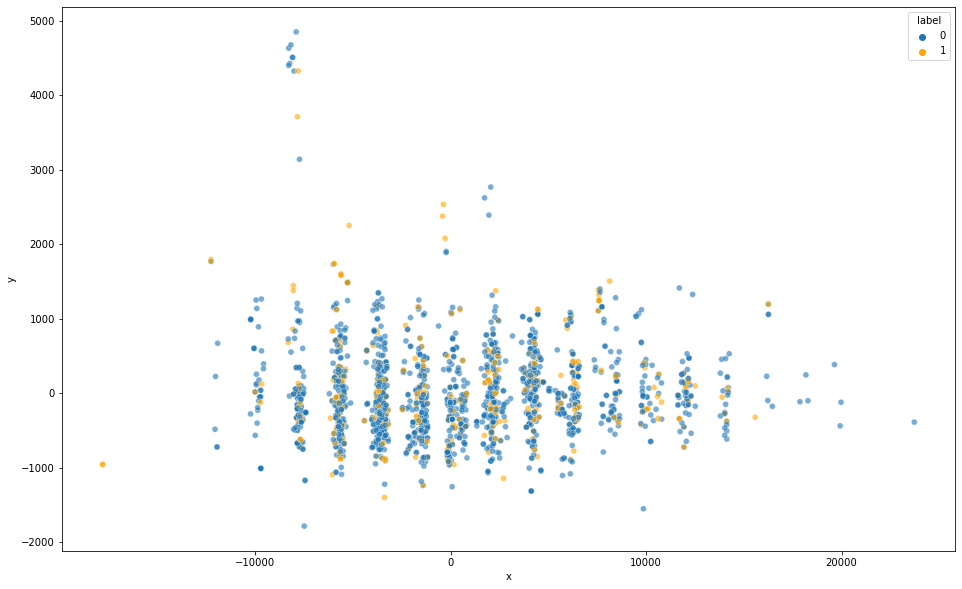

In [64]:
plot_pca_precomp(pca_transformed, y_data.tolist(), [1,2])

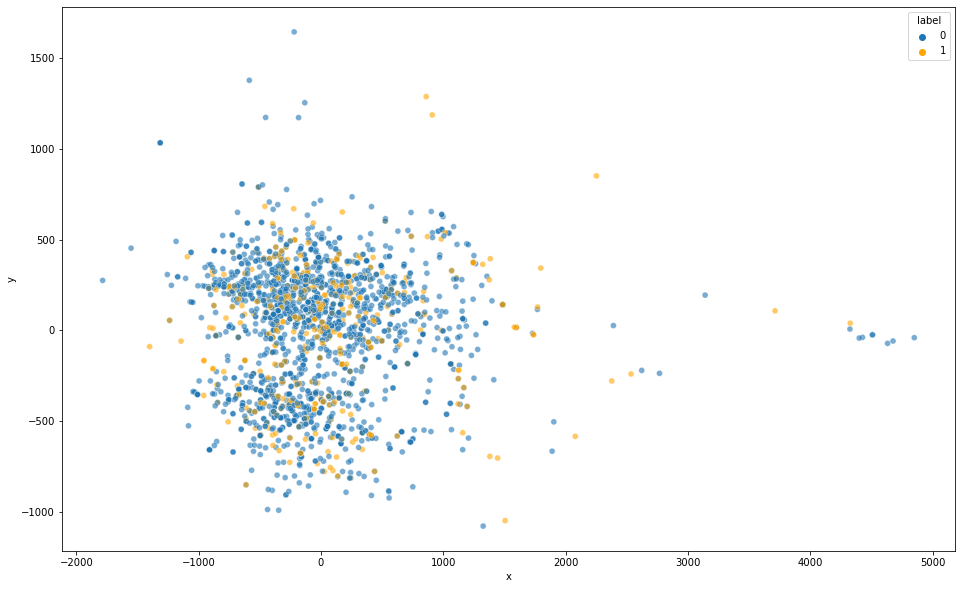

In [65]:
plot_pca_precomp(pca_transformed, y_data.tolist(), [2,3])

# Embeddings - Yang

## t-SNE

In [66]:
def compute_and_plot(data):
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    X_embedded = tsne.fit_transform(data.iloc[:,1:129])
    
    df = pd.DataFrame()
    df['x'] = X_embedded[:,0]
    df['y'] = X_embedded[:,1]
    df["label"] = data["Y"]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        legend="full",
        alpha=0.7
    )
    plt.show()

t-SNE for embeddings from original_3_1:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.000s...
[t-SNE] Computed neighbors for 2409 samples in 0.270s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.361954
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.182144
[t-SNE] KL divergence after 300 iterations: 1.283949


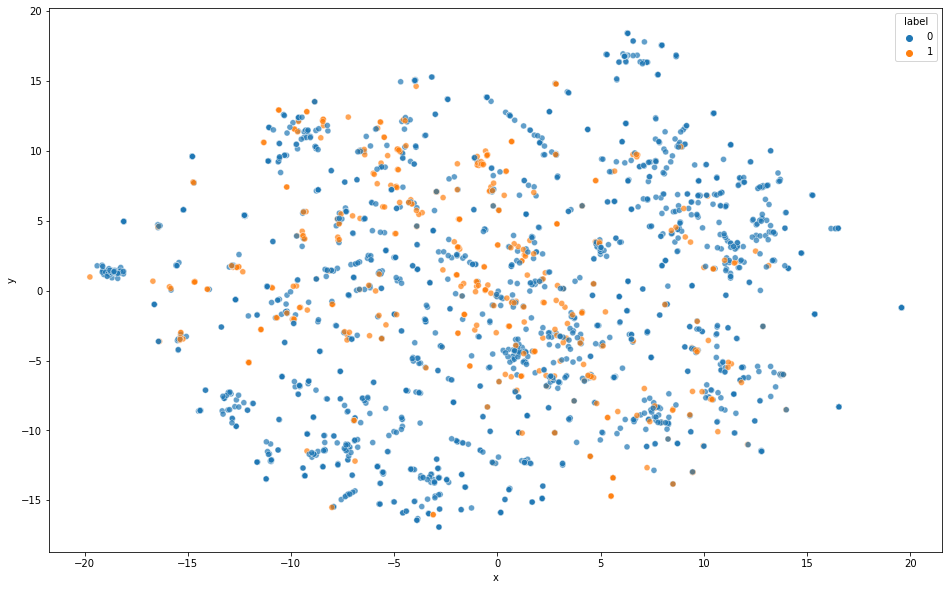



t-SNE for embeddings from original_3_2:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.000s...
[t-SNE] Computed neighbors for 2409 samples in 0.215s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.348209
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.958633
[t-SNE] KL divergence after 300 iterations: 1.294972


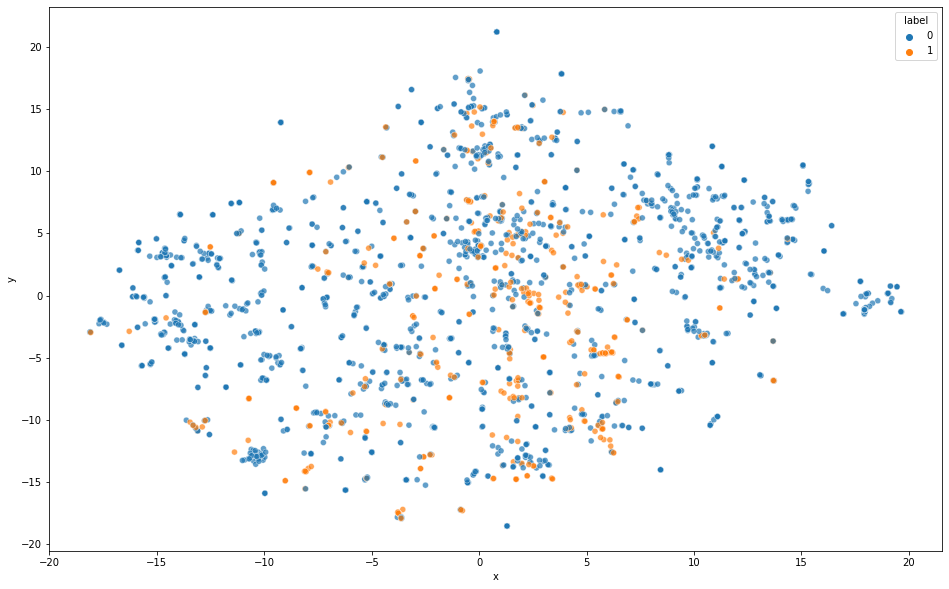



t-SNE for embeddings from original_3_3:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.000s...
[t-SNE] Computed neighbors for 2409 samples in 0.217s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.351044
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.077530
[t-SNE] KL divergence after 300 iterations: 1.299317


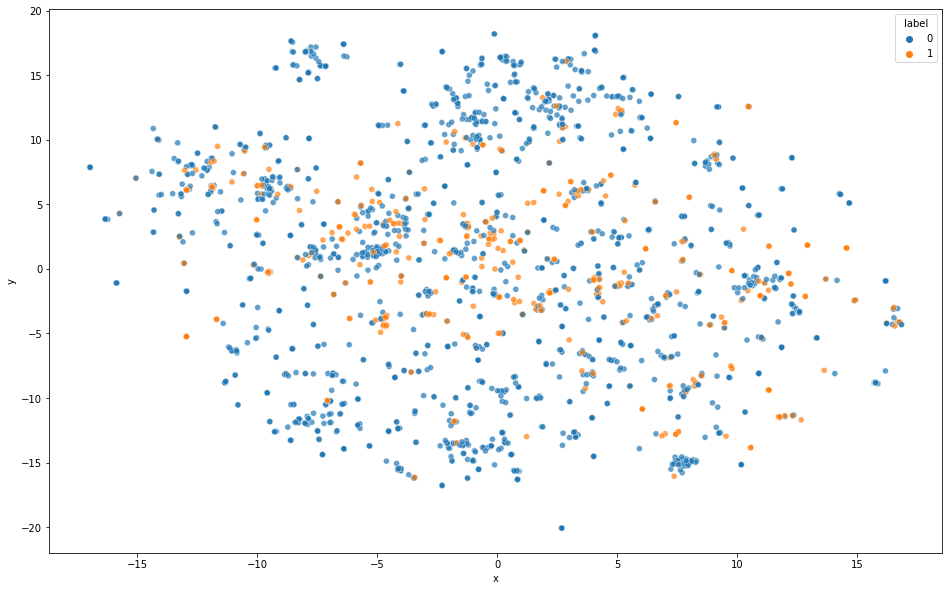



t-SNE for embeddings from original_3_4:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.000s...
[t-SNE] Computed neighbors for 2409 samples in 0.266s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.355845
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.355743
[t-SNE] KL divergence after 300 iterations: 1.288722


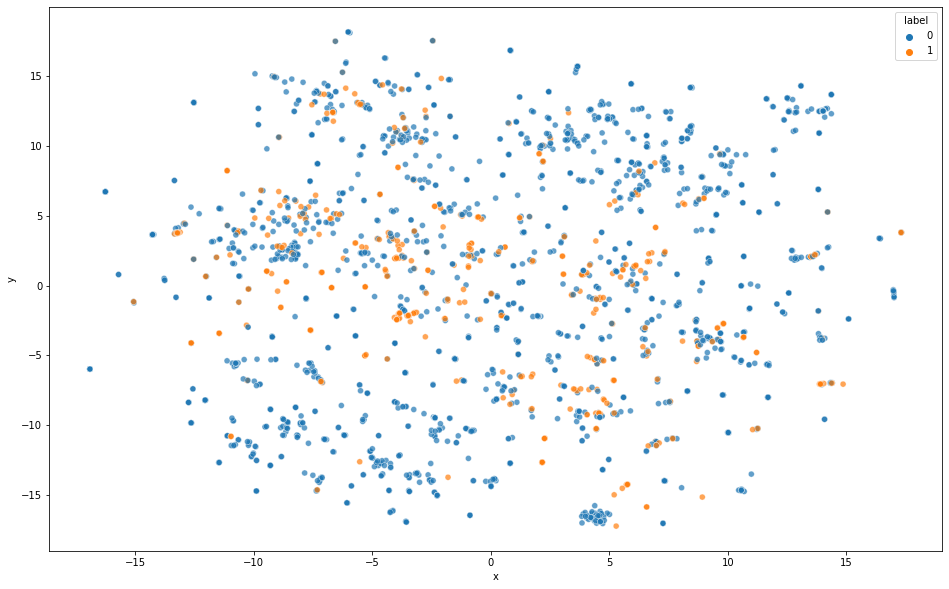



t-SNE for embeddings from original_3_5:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.000s...
[t-SNE] Computed neighbors for 2409 samples in 0.227s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.357256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.734482
[t-SNE] KL divergence after 300 iterations: 1.309062


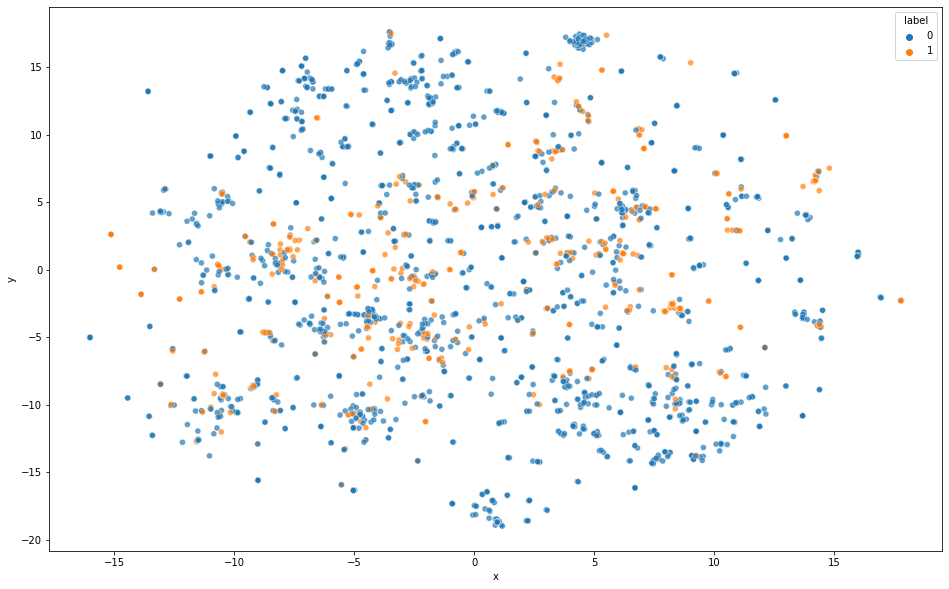



t-SNE for embeddings from original_3_6:
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2409 samples in 0.000s...
[t-SNE] Computed neighbors for 2409 samples in 0.210s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2409
[t-SNE] Computed conditional probabilities for sample 2000 / 2409
[t-SNE] Computed conditional probabilities for sample 2409 / 2409
[t-SNE] Mean sigma: 0.355735
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.250862
[t-SNE] KL divergence after 300 iterations: 1.272750


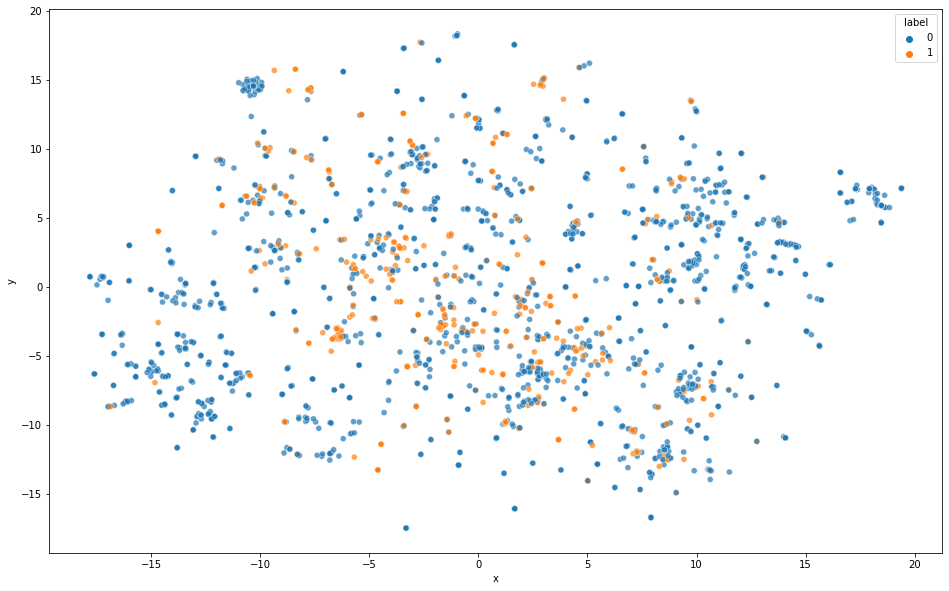

In [69]:
variants = [f"3_{i}" for i in range(1, 7)]
#variants = ["3_3"]
for variant in variants:
    embedding_data = pd.read_feather(f"{DATA_DIR}/chen/embeddings/embeddings_train_original_{variant}.ftr")
    valid = pd.read_feather(f"{DATA_DIR}/chen/embeddings/embeddings_valid_original_{variant}.ftr")
    test = pd.read_feather(f"{DATA_DIR}/chen/embeddings/embeddings_test_original_{variant}.ftr")
    embedding_data = pd.concat([embedding_data, valid, test])
    
    embedding_data = embedding_data.merge(chen_data, how="outer", on="Ab_ID")
    
    print(f"t-SNE for embeddings from original_{variant}:")
    compute_and_plot(embedding_data)
    print("\n")

## PCA

PCA for embeddings from original_3_1:


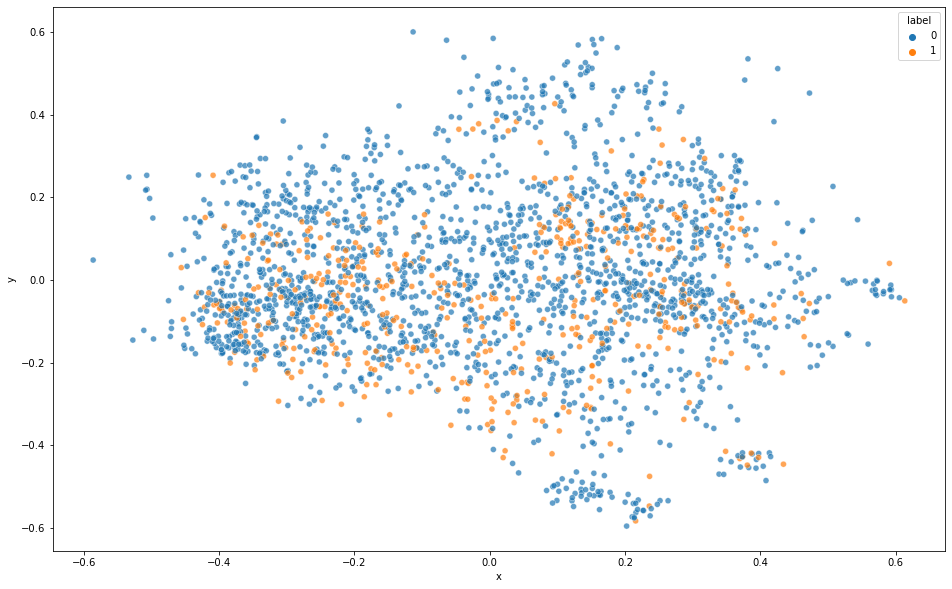



PCA for embeddings from original_3_2:


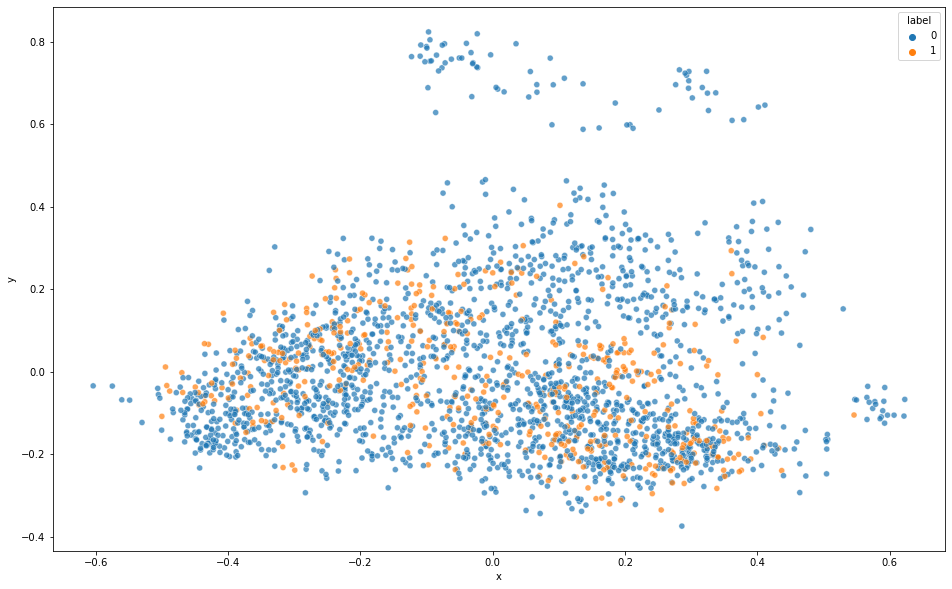



PCA for embeddings from original_3_3:


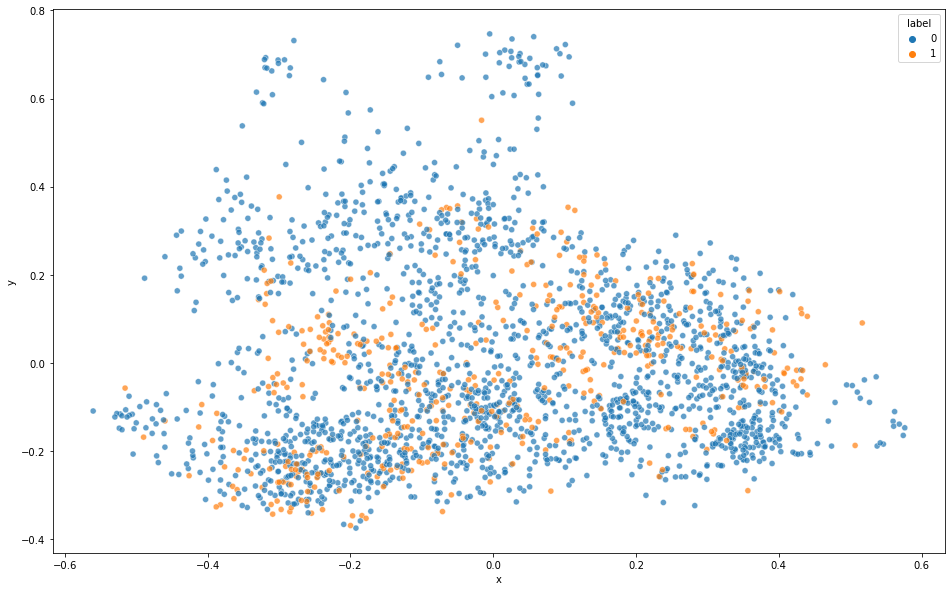



PCA for embeddings from original_3_4:


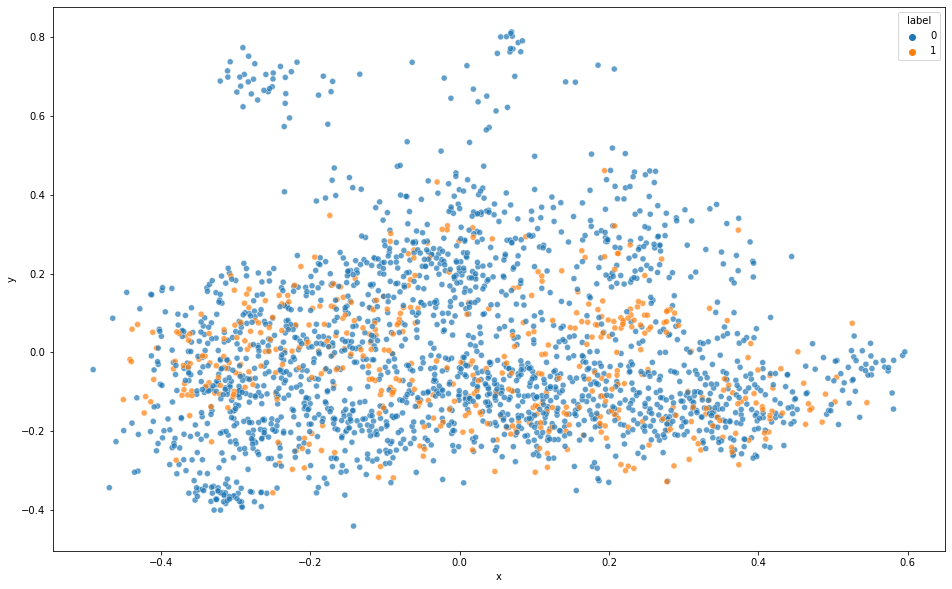



PCA for embeddings from original_3_5:


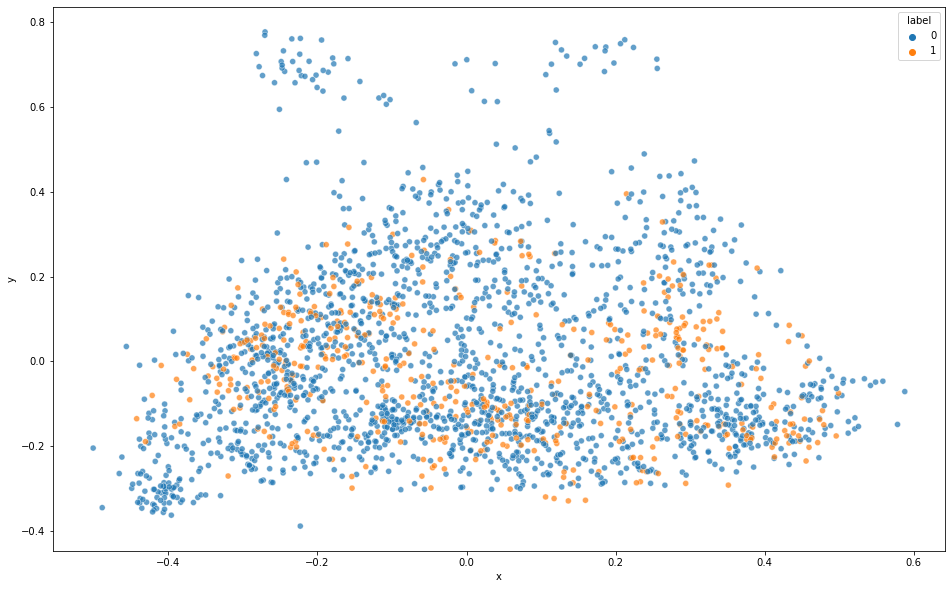



PCA for embeddings from original_3_6:


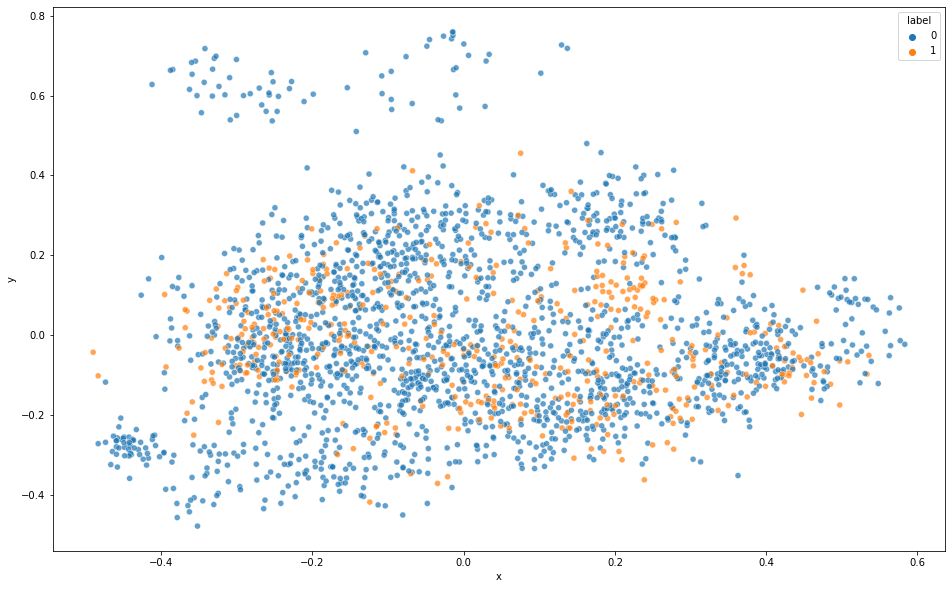

In [70]:
variants = [f"3_{i}" for i in range(1, 7)]
#variants = ["3_3"]
for variant in variants:
    embedding_data = pd.read_feather(f"{DATA_DIR}/chen/embeddings/embeddings_train_original_{variant}.ftr")
    valid = pd.read_feather(f"{DATA_DIR}/chen/embeddings/embeddings_valid_original_{variant}.ftr")
    test = pd.read_feather(f"{DATA_DIR}/chen/embeddings/embeddings_test_original_{variant}.ftr")
    embedding_data = pd.concat([embedding_data, valid, test])
    
    embedding_data = embedding_data.merge(chen_data, how="outer", on="Ab_ID")
    
    print(f"PCA for embeddings from original_{variant}:")
    compute_and_plot_pca(embedding_data)
    print("\n")

In [67]:
def compute_and_plot_pca(data):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data.iloc[:,1:129])
    
    df = pd.DataFrame()
    df['x'] = X_pca[:,0]
    df['y'] = X_pca[:,1]
    df["label"] = data["Y"]

    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        legend="full",
        alpha=0.7
    )
    plt.show()

# One-hot encoding
## t-SNE

In [9]:
X_data_heavy = pd.read_feather(path.join(DATA_DIR, "chen/abnumber/chen_heavy_one_hot.ftr"))
X_data_light = pd.read_feather(path.join(DATA_DIR, "chen/abnumber/chen_light_one_hot.ftr"))

In [10]:
X_data_heavy

index Ab_ID  A_1  C_1  D_1  E_1  F_1  G_1  H_1  I_1  ...  O_204  P_204  \
0         0  12e8    0    0    0    1    0    0    0    0  ...      0      0   
1         1  15c8    0    0    0    1    0    0    0    0  ...      0      0   
2         2  1a0q    0    0    0    1    0    0    0    0  ...      0      0   
3         3  1a14    0    0    0    0    0    0    0    0  ...      0      0   
4         4  1a2y    0    0    0    0    0    0    0    0  ...      0      0   
...     ...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
2402   2404  6s5a    0    0    0    1    0    0    0    0  ...      0      0   
2403   2405  6tyb    0    0    0    1    0    0    0    0  ...      0      0   
2404   2406  6u1t    0    0    0    1    0    0    0    0  ...      0      0   
2405   2407  7fab    1    0    0    0    0    0    0    0  ...      0      0   
2406   2408  8fab    1    0    0    0    0    0    0    0  ...      0      0   

      Q_204  R_204  S_204  T_204  U_204  V_204  W_204  Y_204  
0         0      0      0      0      0      0      0      0  
1         0      0      1      0      0      0      0      0  
2         0      0      1      0      0      0      0      0  
3         0      0      0      0      0      0      0      0  
4         0      0      1      0      0      0      0      0  
...     ...    ...    ...    ...    ...    ...    ...    ...  
2402      0      0      0      0      0      0      0      0  
2403      0      0      1      0      0      0      0      0  
2404      0      0      0      0      0      0      0      0  
2405      0      0      1      0      0      0      0      0  
2406      0      0      1      0      0      0      0      0  

[2407 rows x 4490 columns]

In [12]:
X_data = X_data_heavy.drop("index", axis=1).merge(X_data_light.drop("Id", axis=1), on="Ab_ID", suffixes=["_h", "_l"])
X_data = X_data.merge(chen_data[["Ab_ID", "Y"]], on="Ab_ID")
X_data

Ab_ID  A_1_h  C_1_h  D_1_h  E_1_h  F_1_h  G_1_h  H_1_h  I_1_h  K_1_h  \
0     12e8      0      0      0      1      0      0      0      0      0   
1     15c8      0      0      0      1      0      0      0      0      0   
2     1a0q      0      0      0      1      0      0      0      0      0   
3     1a14      0      0      0      0      0      0      0      0      0   
4     1a2y      0      0      0      0      0      0      0      0      0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2402  6s5a      0      0      0      1      0      0      0      0      0   
2403  6tyb      0      0      0      1      0      0      0      0      0   
2404  6u1t      0      0      0      1      0      0      0      0      0   
2405  7fab      1      0      0      0      0      0      0      0      0   
2406  8fab      1      0      0      0      0      0      0      0      0   

      ...  P_138_l  Q_138_l  R_138_l  S_138_l  T_138_l  U_138_l  V_138_l  \
0     ...        0        0        0        0        0        0        0   
1     ...        0        0        0        0        0        0        0   
2     ...        0        0        0        0        0        0        0   
3     ...        0        0        0        0        0        0        0   
4     ...        0        0        0        0        0        0        0   
...   ...      ...      ...      ...      ...      ...      ...      ...   
2402  ...        0        0        0        0        0        0        0   
2403  ...        0        0        0        0        0        0        0   
2404  ...        0        0        0        0        0        0        0   
2405  ...        0        0        0        0        0        0        0   
2406  ...        0        0        0        0        0        0        0   

      W_138_l  Y_138_l  Y  
0           0        0  0  
1           0        0  0  
2           0        0  1  
3           0        0  0  
4           0        0  0  
...       ...      ... ..  
2402        0        0  0  
2403        0        0  0  
2404        0        0  0  
2405        0        0  0  
2406        0        0  0  

[2407 rows x 7526 columns]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2405 samples in 0.012s...
[t-SNE] Computed neighbors for 2405 samples in 1.359s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2405
[t-SNE] Computed conditional probabilities for sample 2000 / 2405
[t-SNE] Computed conditional probabilities for sample 2405 / 2405
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.044174
[t-SNE] KL divergence after 300 iterations: 1.033228


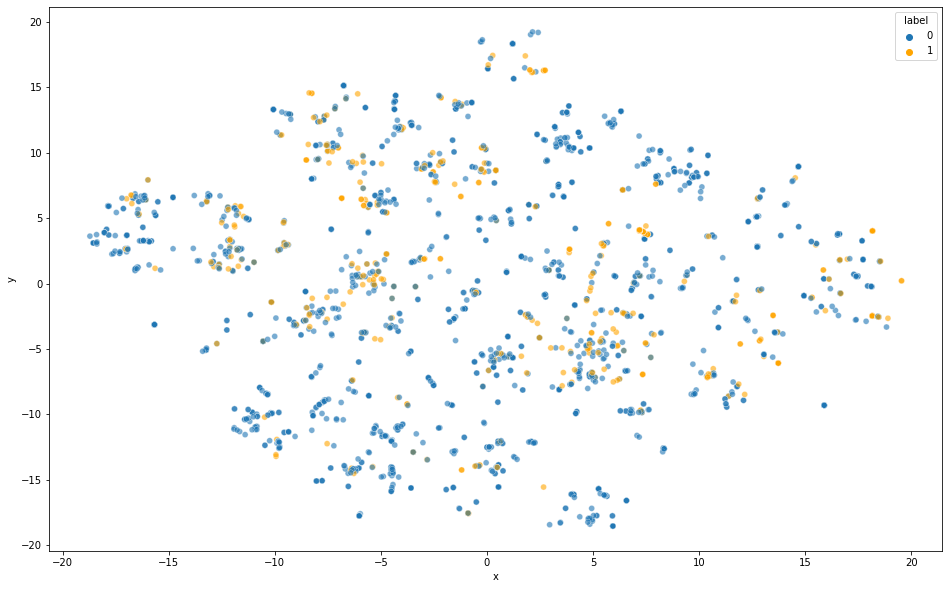

In [74]:
plot_tsne(X_data.drop(["Ab_ID", "Y"], axis=1), X_data["Y"], components=2, perplexity=40, n_iter=300, metric="euclidean")

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 2407 samples in 0.010s...
[t-SNE] Computed neighbors for 2407 samples in 1.216s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2407
[t-SNE] Computed conditional probabilities for sample 2000 / 2407
[t-SNE] Computed conditional probabilities for sample 2407 / 2407
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.465706
[t-SNE] KL divergence after 5000 iterations: 0.238136


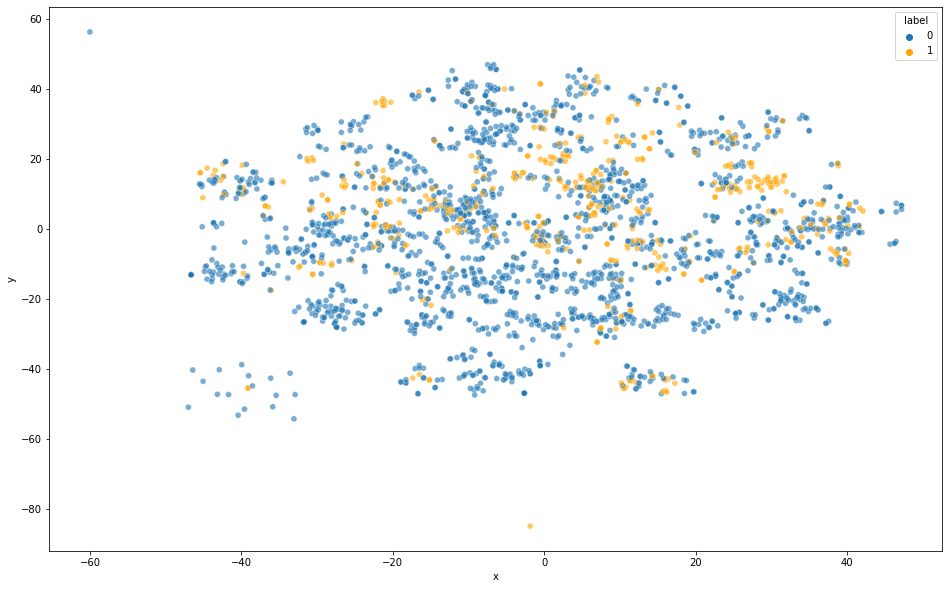

In [15]:
plot_tsne(X_data.drop(["Ab_ID", "Y"], axis=1), X_data["Y"], components=3, perplexity=6, n_iter=5000, metric="cosine")

/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/brazdilv/.conda/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:827: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning,


[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 2407 samples in 0.010s...
[t-SNE] Computed neighbors for 2407 samples in 1.079s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2407
[t-SNE] Computed conditional probabilities for sample 2000 / 2407
[t-SNE] Computed conditional probabilities for sample 2407 / 2407
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.314720
[t-SNE] KL divergence after 5000 iterations: 0.234726


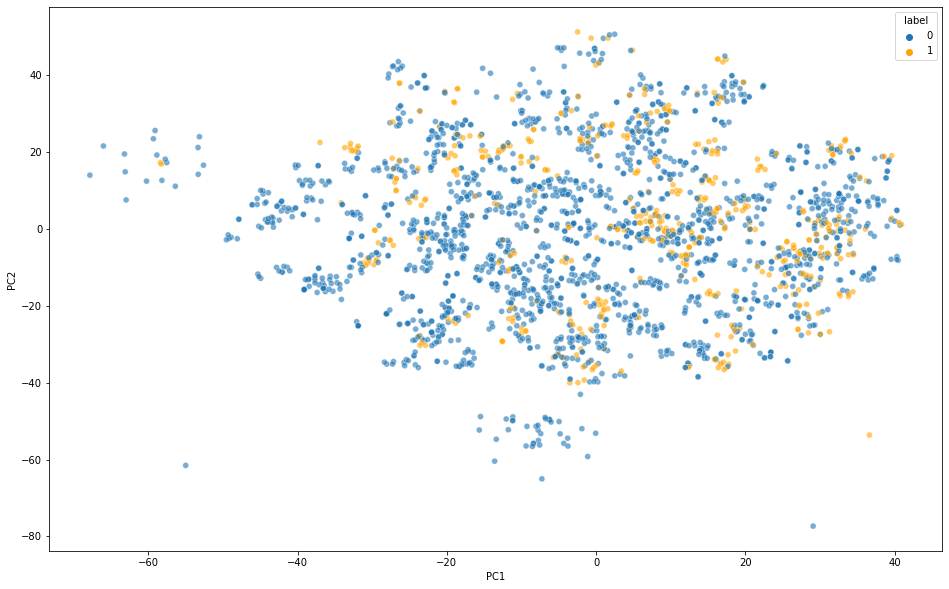

In [17]:
x = X_data.drop(["Ab_ID", "Y"], axis=1)
y = X_data["Y"]
tsne = TSNE(n_components=3, verbose=1, perplexity=6, n_iter=5000, metric="cosine")
X_embedded = tsne.fit_transform(x)

df = pd.DataFrame()
df['x'] = X_embedded[:,0]
df['y'] = X_embedded[:,1]
df["label"] = y

plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="x", y="y",
    hue="label",
    data=df,
    legend="full",
    alpha=0.6,
    palette=['#1f76b4','orange']
)
ax.set(xlabel='PC1', ylabel='PC2')
plt.show()

## PCA

In [16]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data.drop(["Ab_ID", "Y"], axis=1))

<AxesSubplot:xlabel='x', ylabel='y'>

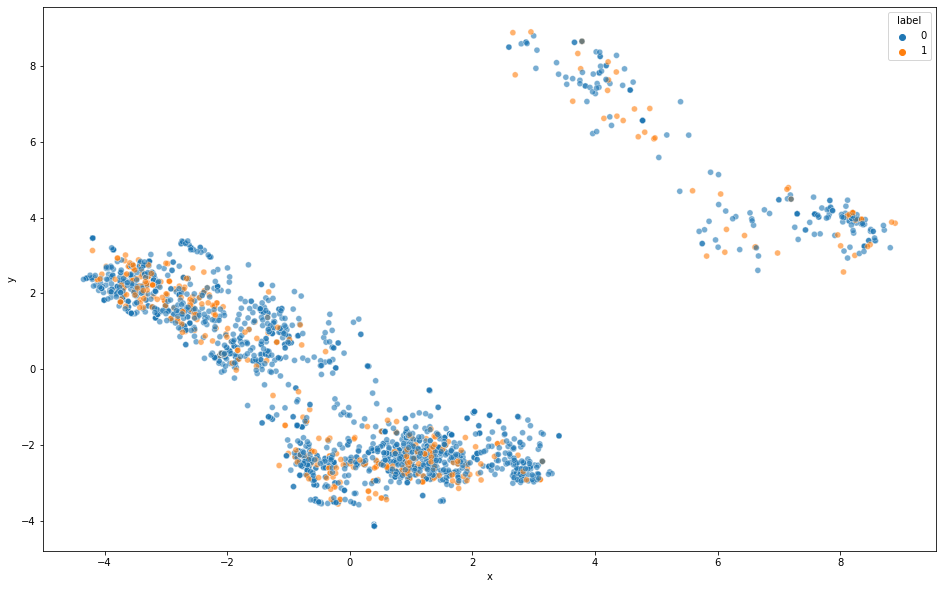

In [18]:
df = pd.DataFrame()
df['x'] = X_pca[:,0]
df['y'] = X_pca[:,1]
df["label"] = X_data["Y"]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="label",
    data=df,
    legend="full",
    alpha=0.6
)